# Titanic datset analysis : 

### -       What factors made people more likely to survive?
### -       Predict if a passenger is a survivor or not given the traits

In [9]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Data Summary

In [10]:
df = pd.read_csv('titanic_data.csv')
print df.head(n=2)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [11]:
print "Summary of numerical variables : \n"
print df.describe()
print
print 'Summary of categorical variables : \n'
print df.describe(include = ['O'])
print

# Overall distribution of survivors:
by_survival = df.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print "Total Survivors and Non-Survivors"
print by_survival
print '\nRatio of non_survivors/survivors: ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

Summary of numerical variables : 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary of categorical variables : 

        

## Data Pre-processing/Cleaning:

In [12]:
# Check for Missing values:
is_null_df = pd.isnull(df)

# Get sum of missing values for each variable:
print "MISSING VALUES TABLE \n"
print is_null_df.sum()

MISSING VALUES TABLE 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Notes:
1. From summary : No outliers in any of the numeric attributes
2. There are missing variables for Age, Cabin and Embarked. Cabin has more than 50% of missing variables. Age and Embarked has lesser missing variables which can be removed. 

In [13]:
# Check the distribution of 'Survived' class for data points with missing age
df_missing_age = df['Age'].dropna()

s_null_age = pd.isnull(df['Age'])
df_missing_age = df[s_null_age]
print df_missing_age.shape
print
print df_missing_age.describe()
print

by_survival = df_missing_age.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print by_survival
print '\nRatio of non_survivors/survivors for missing age : ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

(177, 12)

       PassengerId    Survived      Pclass  Age       SibSp       Parch  \
count   177.000000  177.000000  177.000000  0.0  177.000000  177.000000   
mean    435.581921    0.293785    2.598870  NaN    0.564972    0.180791   
std     250.552901    0.456787    0.763216  NaN    1.626316    0.534145   
min       6.000000    0.000000    1.000000  NaN    0.000000    0.000000   
25%     230.000000    0.000000    3.000000  NaN    0.000000    0.000000   
50%     452.000000    0.000000    3.000000  NaN    0.000000    0.000000   
75%     634.000000    1.000000    3.000000  NaN    0.000000    0.000000   
max     889.000000    1.000000    3.000000  NaN    8.000000    2.000000   

             Fare  
count  177.000000  
mean    22.158567  
std     31.874608  
min      0.000000  
25%      7.750000  
50%      8.050000  
75%     24.150000  
max    227.525000  

   Survived  PassengerId
0         0          125
1         1           52

Ratio of non_survivors/survivors for missing age : 2.403

In [14]:
# Check the distribution of 'Survived' class with data points for valid age
def is_null(x):
    if x == True:
        return False
    else:
        return True
    
# remove missing age:

s_null_age = pd.isnull(df['Age'])
s_valid_age = s_null_age.apply(is_null)

df_no_missing_age = df[s_valid_age]

print df_no_missing_age.shape
print
print df_no_missing_age.describe()
print

by_survival = df_no_missing_age.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print by_survival
print '\nRatio of non_survivors/survivors for missing age : ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

(714, 12)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  714.000000  714.000000  
mean     0.431373   34.694514  
std      0.853289   52.918930  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.741700  
75%      1.000000   33.375000  
max      6.000000  512.329200  

   Survived  PassengerId
0         0          424
1         1        

### Note on missing data: 
In the original data, the ratio of non-survivors/survivors is 1.6. On the other hand, data with missing ages has 125 passengers who died versus 52 survivors (a ratio of 2.45). And, for passengers whose age is known, 1.5 passengers died for each survivor.  

The age of more dead passengers remains unknown as opposed to the survivors. For the remaining analysis, I will remove the missing age data points, since the total class distribution doesn't change much after the missing ages are dropped.

Cabin: Too many Cabin variables are missing, so the variable will have to be omitted 

## Data Exploration:
I begin with exploring the attributes and investigate how specific variables differ for survivors and non-survivors. Based on the results, we decide what statistical tests can be done to draw meaningful conclusions from the dataset. The variables plotted below are:
1. Age
2. Sex
3. Fare
4. Siblings

In [16]:
# Age Distribution by Survival
df_survivors = df_no_missing_age[df_no_missing_age['Survived'] == 1]
df_died = df_no_missing_age[df_no_missing_age['Survived'] == 0]

print "Number of survivors in processed data : " + str(df_survivors.shape[0])
print "Number of non-survivors in processed data : " + str(df_died.shape[0])

Number of survivors in processed data : 290
Number of non-survivors in processed data : 424


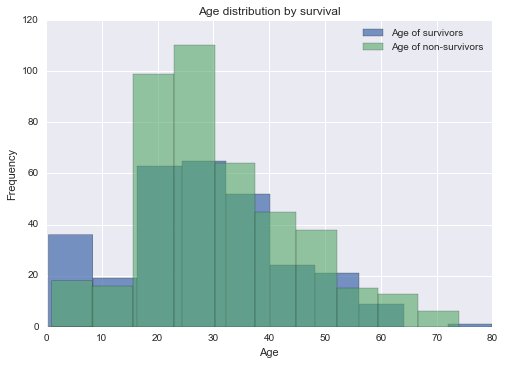

In [7]:
# Age distribution by survival

plt.hist(df_survivors['Age'], alpha=.75, label='Age of survivors')
plt.hist(df_died['Age'], alpha=0.60, label='Age of non-survivors')
plt.title('Age distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Age')

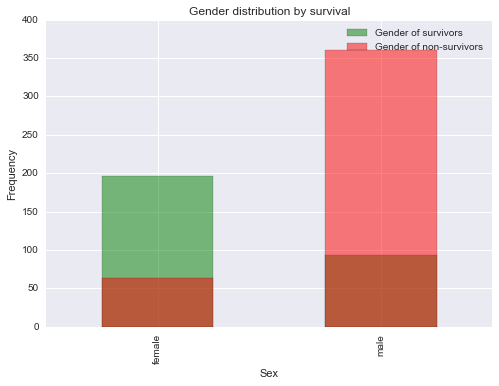

In [8]:
# Sex distribution by Survival

df_survivors.groupby('Sex').size().plot(kind='bar',alpha = .5,color = 'green', label = 'Gender of survivors')
df_died.groupby('Sex').size().plot(kind='bar',alpha =.5, color = 'red',label = 'Gender of non-survivors')
plt.title('Gender distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Sex')

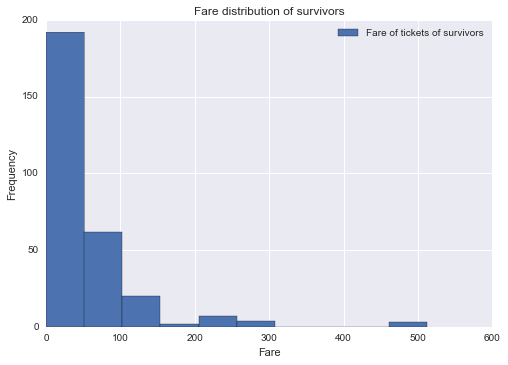

In [9]:
# Fare distribution of survivors vs non survivors

plt.hist(df_survivors['Fare'], label='Fare of tickets of survivors')
plt.title('Fare distribution of survivors')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Fare')

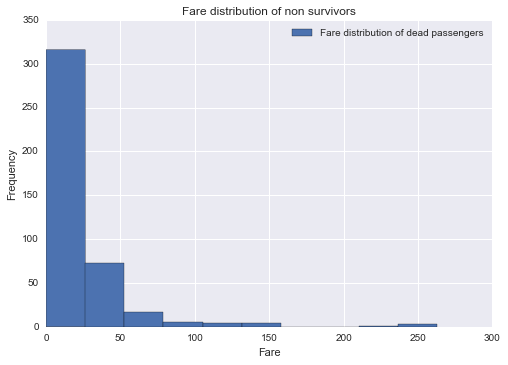

In [10]:
plt.hist(df_died['Fare'], label='Fare distribution of dead passengers')
plt.title('Fare distribution of non survivors')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Fare')

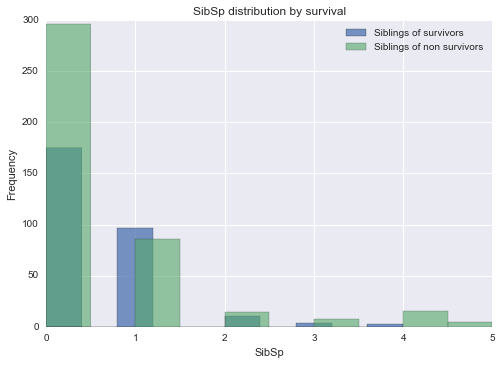

In [11]:
# SibSp distribution by survival

plt.hist(df_survivors['SibSp'], alpha=.75, label='Siblings of survivors')
plt.hist(df_died['SibSp'], alpha=0.60, label='Siblings of non survivors')
plt.title('SibSp distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('SibSp')

## Insights from the plots :
1. Age by Survival chart shows that more of the survivors were children or old passengers. All other age groups consist of more non-survivors - specially the age group 20-30. 

2. More of the survivors were women than men. 

3. The Fare distribution charts also reveal that anyone above 300 fare survived. Passengers who paid higher fares included more survivors than those who paid lower fares.

4. Number of siblings doesn't provide any insight if there is any effect on survivality.

## Statistical Tests: 
### T-test: Are the age distribution of survivors and non-survivors signficantly different? 

Null Hypothesis: Average age of survivors =  Average age of non-survivors (i.e., both samples drawn from same population)

Alternate Hypothesis: Average age of survivors !=  Average age of non-survivors

Assumptions: Sample data used can estimate the population variance. 

Level of Significance = 5%

In [24]:
# T-test : Are the age distribution of survivors and non-survivors signficantly different?

from scipy.stats import ttest_ind

alpha = 0.05

# a t_test function returning the inference based on alpha level and one/two tailed test
def t_test(a,b,alpha,tail):
    t, p = ttest_ind(a, b, equal_var=False)
    print("ttest_ind: t = %g  p = %g" % (t, p))
    
    # scipy returns a two-tailed p value. Convert to one tailed p-value for one sided test.
    p_tail_based = p
    if tail == 1:
        p_tail_based = p/2
        
    if p_tail_based < alpha:
        return "We may reject the null hypothesis as p < alpha(" + str(alpha) + ")"
    else:
        return "We accept the null hypothesis as p > alpha(" + str(alpha) + ")"
        
survivors_age = list(df_survivors['Age'])
non_survivors_age = list(df_died['Age'])

print t_test(survivors_age,non_survivors_age,alpha,2)

#t, p = ttest_ind(survivors_age, non_survivors_age, equal_var=False)
#print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -2.04603  p = 0.0411897
We may reject the null hypothesis as p < alpha(0.05)


### Inference:
Given p value is less than alpha level of significance (5%), we may reject the null hypothesis. The difference between average age of survivors and non-survivors is statistically significant 

## Statistical Tests 

### T-test: Does women have a better chance of survivality than men?

Null Hypothesis: No difference in survivality between men and women

Alternate Hypothesis: Women have a better chance of survivality than men

Note: One tailed test

In [26]:
# T-test: Does women have a better chance of survivality than men? (One tailed test)

from scipy.stats import ttest_ind

df_women = df_no_missing_age[df_no_missing_age['Sex'] == 'female']
df_men = df_no_missing_age[df_no_missing_age['Sex'] == 'male']

survival_women = list(df_women['Survived'])
survival_men = list(df_men['Survived'])

print t_test(survival_women,survival_men,alpha,1)

ttest_ind: t = 16.7764  p = 1.05339e-50
We may reject the null hypothesis as p < alpha(0.05)


### Inference:
Given p value is less than alpha level of significance (5%), we may reject the null hypothesis. The difference in survivality is statistically significant between men and women

## Correlation between variables

In [185]:
print df.corr()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


### Notes:
There are no strong correlation between any of the attributes. (Fare and Class has a -.54 correlation which is evident)

### Bivariate Plots:

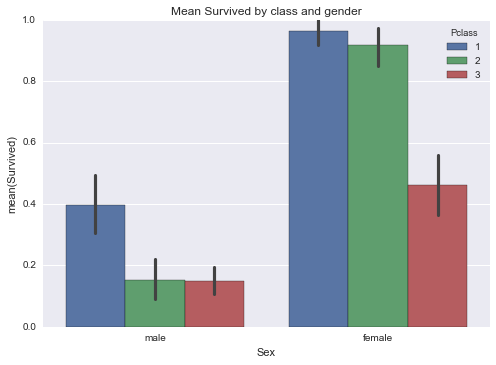

In [7]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_no_missing_age)
plt.title('Mean Survived by class and gender')

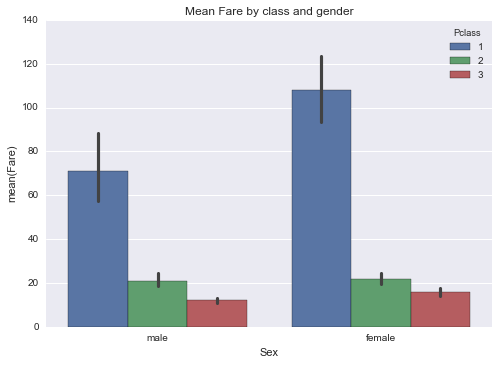

In [8]:
sns.barplot(x='Sex', y='Fare', hue='Pclass', data=df_no_missing_age)
plt.title('Mean Fare by class and gender')

### Insights from the plots
Plotting Age and class against mean survived - validates again that far more women survived than men and the number of first class survivors were almost four times of other classes for both men and women. Mean fare vs Age and Class reveals that more women paid higher fares, were in first class and more survived.

## Multivariate plots - comparing age, gender, fare and siblings 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


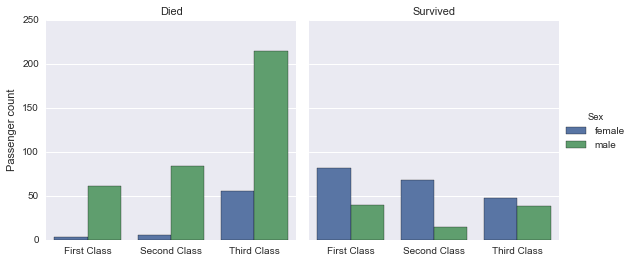

In [63]:
# Create a new variable 'Survival' mapping from 'Survived'
df_no_missing_age['Survival'] = df_no_missing_age.Survived.map({0 : 'Died', 1 : 'Survived'})

t = df_no_missing_age.groupby(['Pclass', 'Sex', 'Survival'], as_index = False)['Name'].count()
print 
p = sns.factorplot(data = t, x = 'Pclass', y = 'Name', col = 'Survival', hue = 'Sex', kind = 'bar')
(p.set_axis_labels('', 'Passenger count').set_xticklabels(['First Class', 'Second Class', 'Third Class']).set_titles("{col_name}"))

In [61]:
# Create bins for age categories and compare with 
bins = [0, 10, 20, 65, 100]
group_names = ['Child', 'Teenager', 'Adult', 'Senior']
age_category = pd.cut(df_no_missing_age['Age'], bins, labels=group_names)
df_no_missing_age['age_category'] = pd.cut(df_no_missing_age['Age'], bins, labels=group_names)

print df_no_missing_age.groupby(['age_category'], as_index = False)['Name'].count()

  age_category  Name
0        Child    64
1     Teenager   115
2        Adult   527
3       Senior     8


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


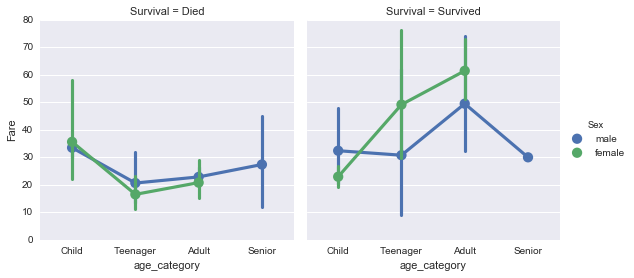

In [64]:
# Plotting Fare by age categories and gender
sns.factorplot(x="age_category", y="Fare", col = 'Survival',hue="Sex", data=df_no_missing_age)

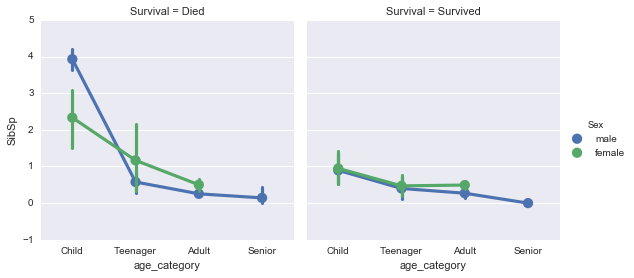

In [65]:
# Plotting Siblings by age categories and gender
sns.factorplot(x="age_category", y="SibSp", col = 'Survival',hue="Sex", data=df_no_missing_age)

## Insights from the Multivariate graphs:

Plotting the variables by different segments us the following insights:
1. We again see that most of the women from First and Second Class survived barring a few. However almost 50% of women in Third Class died. Men in all classes have a much higher number of non-survivors. An interesting note is that the number of men in First and Third Class is almost equal while lesser men from Second Class survived.

2. Segmenting the data by Fare, age_category and gender shows that child and seniors have same fare in both survival categories. But there is a significant difference in fare for adults and teenagers among who died and survived. Women have a much higher fare - and it possibly is the effect of the fares paid by more women (than men) for First and Second classes.

3. Segmenting the data by SibSp, age_category and gender - shows that more children with higher number of siblings died than those who had one or less. Also, for teenagers, more women with higher number of siblings died.

## Predict if a passenger is a survivor given the traits

In [47]:
# Processing the dataset to fit classification models

# 1. Convert categorical data to numerical data by creating dummy variables

df_no_missing_age = df_no_missing_age.drop('PassengerId', 1)

df_no_missing_age_dummies = pd.concat([df_no_missing_age, 
                               pd.get_dummies(df_no_missing_age['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x)), 
                               pd.get_dummies(df_no_missing_age['Sex']).rename(columns=lambda x: 'Sex_' + str(x))],
                                axis=1)
print df_no_missing_age_dummies.columns.values

df_no_missing_age_dummies = df_no_missing_age_dummies.drop(['Name','Cabin', 'Ticket','Sex','Embarked'], axis=1)
print
print df_no_missing_age_dummies.columns.values
print

df_no_missing_age_dummies_Y = df_no_missing_age_dummies['Survived']
df_no_missing_age_dummies_X = df_no_missing_age_dummies.drop('Survived',1)

print df_no_missing_age_dummies_Y.head()
print df_no_missing_age_dummies_X.columns.values

# 2. Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_no_missing_age_dummies_X, df_no_missing_age_dummies_Y, test_size=0.33, random_state=42)


['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Sex_female'
 'Sex_male']

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male']

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male']


In [51]:
#Fitting a decision tree and predict the accuracy of the model

from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

clfr = DecisionTreeClassifier()
tree.fit = clfr.fit(X_train, y_train)

clfr.predict(X_test)
tree_accuracy = clfr.score(X_test, y_test, sample_weight=None)
print "Accuracy of a Decision Tree : " + str(tree_accuracy)


Accuracy of a Decision Tree : 0.758474576271


Accuracy of a Random Forest : 0.783898305085

Feature ranking:
1. feature 1 / Age : (0.277743)
2. feature 4 / Fare : (0.205509)
3. feature 9 / Sex_male : (0.179602)
4. feature 8 / Sex_female : (0.130091)
5. feature 0 / Pclass : (0.101731)
6. feature 2 / SibSp : (0.040881)
7. feature 3 / Parch : (0.040579)
8. feature 5 / Embarked_C : (0.011103)
9. feature 7 / Embarked_S : (0.009570)
10. feature 6 / Embarked_Q : (0.003191)


(-1, 10)

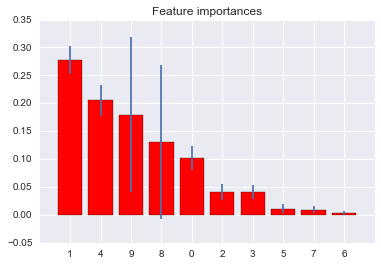

In [52]:
# Fitting a random forest and predict the accuracy of the model

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

# X_train, X_test, y_train, y_test
X = X_train
y = y_train
forest.fit(X, y)
forest.predict(X_test)
forest_accuracy = forest.score(X_test, y_test, sample_weight=None)
print "Accuracy of a Random Forest : " + str(forest_accuracy)
print 

importances = forest.feature_importances_

# feature names
feature_names = np.array(X_train.columns.values)

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d / %s : (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

### Notes:
Fitting a decision tree gives 76 % accuracy of predicting the survivality of a passenger while Random Forests increase the accuracy to 78%. The most important features in the forest are shown as: Age, Fare, Sex and PClass. From our initial exploration, we did see that all these variables have a distinctive trend between survivors and non-survivors. The feature 'Sex' has a high variability among all trees.

## Limitations of the Analysis:
1. The size of the dataset is relatively small. And omitting the missing values further reduces the dataset. Also, this is a data with limited attributes. With other features like health might also distinguish between survivors and non-survivors after initial rescue.

2. The Age variable has 19% missing values and I chose to omit these values. The overall distribution (ratio of non-survivors to surivors) doesn't change markedly because of the omission. However, most of the missing age values are for non-survivors and this lose of information can have an impact on the result.

3. The decision tree and forest are prone to change with slight changes in data.

## References 
1.  http://matplotlib.org/api/pyplot_api.html
2.  http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib 
3.  https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html
4.  http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
5.  https://www.kaggle.com/c/titanic/forums/t/10433/best-way-to-include-categorial-data-in-the-training-set/55559
6.  http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
7.  http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html 
8.  http://stackoverflow.com/questions/22611446/perform-2-sample-t-test
9.  http://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
10. http://www.graphpad.com/guides/prism/6/statistics/index.htm?one-tail_vs__two-tail_p_values.htm
11. http://chrisalbon.com/python/pandas_binning_data.html 